In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
X = data.data
Y = data.target  

feature_names = data.feature_names
Y_names = data.target_names
### Burak: This mapping is needed to convert Y_names into numeric values.
Y_names_numeric = [i for i in range(len(Y_names))]

n_labels = len(Y_names)
n_samples, n_features = X.shape

print("n_labels=%d \t n_samples=%d \t n_features=%d" % (n_labels, n_samples, n_features))

n_labels=2 	 n_samples=569 	 n_features=30


## Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, train_size=0.8, test_size = 0.2, random_state=0)

In [6]:
Y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

## Support Vector Machine (Breast Cancer)

In [7]:
from sklearn.svm import SVC

In [8]:
from sklearn import metrics 

In [9]:
Y_train_nope = [0 if Y_train[i]==0 else 1 for i in range(len(Y_train))]
Y_test_nope = [0 if Y_test[i]==0 else 1 for i in range(len(Y_test))]

In [10]:
support_vector_classifier = SVC(C=200,kernel='rbf',gamma=0.01,cache_size=8000,probability=False)
support_vector_classifier.fit(X_train, Y_train_nope)

SVC(C=200, cache_size=8000, gamma=0.01)

In [11]:
Y_test_nope_pred = support_vector_classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test_nope, Y_test_nope_pred)
print("accuracy_score={}".format(accuracy_score))

accuracy_score=0.5877192982456141


Confusion Matrix:
[[ 1 46]
 [ 1 66]]


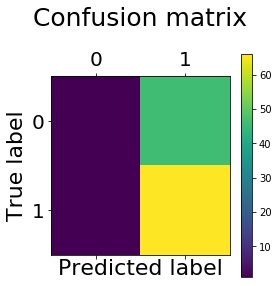

In [12]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test_nope, Y_test_nope_pred)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

In [13]:
print(classification_report(Y_test_nope, Y_test_nope_pred))

              precision    recall  f1-score   support

           0       0.50      0.02      0.04        47
           1       0.59      0.99      0.74        67

    accuracy                           0.59       114
   macro avg       0.54      0.50      0.39       114
weighted avg       0.55      0.59      0.45       114



## One vs Rest Classifier

Let's generalize the above to all classes. We first need to create a binary label for each output class:

In [14]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [15]:
Y_bin = label_binarize(Y, classes=Y_names_numeric)
Y.shape,Y_bin.shape

((569,), (569, 1))

In [16]:
rand_state = np.random.RandomState(42)

### There is a problem if train_ratio=0.80, which gives Y_train_new.shape=119, should be 120.
train_ratio = 0.803
train_indices = rand_state.rand(len(X)) <= train_ratio
train_size = len(X[train_indices])

### Burak: These new train and test sets are only for OVR classifier to avoid conflict with other sets
X_train_new = X[train_indices]
X_test_new = X[~train_indices]

Y_train_new = Y[train_indices]
Y_test_new = Y[~train_indices]

In [17]:
# Binarize the output
Y_bin = label_binarize(Y, classes=Y_names_numeric)

Y_train_ovrc = Y_bin[train_indices]
Y_test_ovrc = Y_bin[~train_indices]

# Learn to predict each class against the other
one_vs_rest_classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=0))
one_vs_rest_classifier.fit(X_train_new, Y_train_ovrc)

# predictions
Y_train_pred_prob_ovrc = one_vs_rest_classifier.predict_proba(X_train_new)
Y_train_pred_ovrc = Y_train_pred_prob_ovrc.argmax(axis=1)
Y_test_pred_prob_ovrc = one_vs_rest_classifier.predict_proba(X_test_new)
Y_test_pred_ovrc = Y_test_pred_prob_ovrc.argmax(axis=1)

In [18]:
accuracy_score = metrics.accuracy_score(Y_test_new, Y_test_pred_ovrc)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.9761904761904762


Confusion Matrix:
[[41  3]
 [ 0 82]]


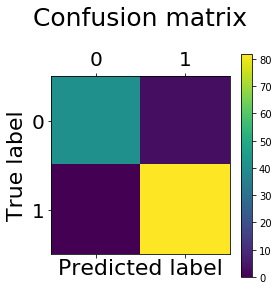

In [19]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test_new, Y_test_pred_ovrc)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

In [20]:
print(classification_report(Y_test_new, Y_test_pred_ovrc))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.96      1.00      0.98        82

    accuracy                           0.98       126
   macro avg       0.98      0.97      0.97       126
weighted avg       0.98      0.98      0.98       126



## Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
decision_tree_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=10)
decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [24]:
decision_tree_classifier.score(X_train, Y_train)

1.0

In [25]:
decision_tree_classifier.score(X_test, Y_test)

0.9035087719298246

In [26]:
Y_train_pred_dt = decision_tree_classifier.predict(X_train)
Y_test_pred_dt = decision_tree_classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_dt)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.9035087719298246


In [27]:
decision_tree_classifier.feature_importances_

array([0.        , 0.02377787, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02233823, 0.0064081 ,
       0.020093  , 0.        , 0.        , 0.0104542 , 0.        ,
       0.00754841, 0.        , 0.        , 0.02072653, 0.        ,
       0.        , 0.08668882, 0.18602039, 0.        , 0.        ,
       0.00754841, 0.        , 0.60198796, 0.0064081 , 0.        ])

Confusion Matrix:
[[43  4]
 [ 7 60]]


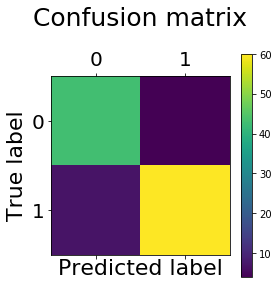

In [28]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_dt)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

In [29]:
print(classification_report(Y_test, Y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        47
           1       0.94      0.90      0.92        67

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



In [30]:
max(decision_tree_classifier.feature_importances_)

0.6019879572984005

## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
random_forest_classifier = RandomForestClassifier(n_jobs=-1, n_estimators=10)
random_forest_classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [33]:
random_forest_classifier.score(X_train, Y_train)

0.9978021978021978

In [34]:
random_forest_classifier.score(X_test, Y_test)

0.956140350877193

In [35]:
Y_train_pred_rf = random_forest_classifier.predict(X_train)
Y_test_pred_rf = random_forest_classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_rf)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.956140350877193


Confusion Matrix:
[[46  1]
 [ 4 63]]


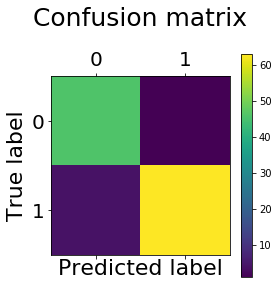

In [36]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_rf)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

In [37]:
print(classification_report(Y_test, Y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Try different values for n_neighbors
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
knn.score(X_train, Y_train)

0.9604395604395605

In [40]:
knn.score(X_test, Y_test)

0.9122807017543859

In [41]:
Y_train_pred_knn = knn.predict(X_train)
Y_test_pred_knn = knn.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_knn)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.9122807017543859


Confusion Matrix:
[[43  4]
 [ 6 61]]


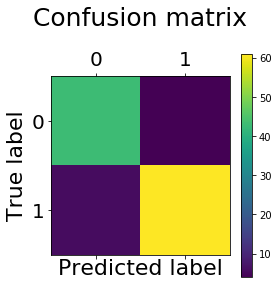

In [42]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_knn)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

In [43]:
print(classification_report(Y_test, Y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        47
           1       0.94      0.91      0.92        67

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



## k-Means Clustering

First let's scale the data (center to the mean and component-wise scale to unit variance) to improve performance.

In [45]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from scipy.stats import mode

In [46]:
X_scaled = scale(X)

In [47]:
# for repeatibility
np.random.seed(42)

# Create the model
kmeans = KMeans(init="random", n_clusters=n_labels, n_init=10)

# fit k-means using this reduced data
kmeans.fit(X_scaled)

KMeans(init='random', n_clusters=2)

In [48]:
clusters = kmeans.predict(X_scaled)
Y_pred = np.zeros_like(clusters)
for i in range(n_labels):
    mask = (clusters == i)
    Y_pred[mask] = mode(Y[mask])[0]

metrics.accuracy_score(Y, Y_pred)

0.9103690685413005

In [49]:
Y_train_pred_kmeans = kmeans.predict(X_train)
Y_test_pred_kmeans = kmeans.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_kmeans)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.41228070175438597


Confusion Matrix:
[[47  0]
 [67  0]]


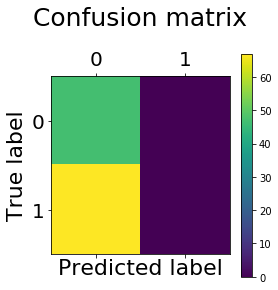

In [50]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_kmeans)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

In [51]:
print(classification_report(Y_test, Y_test_pred_kmeans))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        47
           1       0.00      0.00      0.00        67

    accuracy                           0.41       114
   macro avg       0.21      0.50      0.29       114
weighted avg       0.17      0.41      0.24       114



C:\Users\orsan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gaussian Naive Bayes Classifier

First let's build a  Gaussian Naive Bayes Model out of the box:

In [52]:
from sklearn.naive_bayes import GaussianNB

gaussian_naive_bayes_classifier = GaussianNB()
gaussian_naive_bayes_classifier.fit(X_train, Y_train)

GaussianNB()

In [53]:
gaussian_naive_bayes_classifier.score(X_train, Y_train)

0.9472527472527472

In [54]:
gaussian_naive_bayes_classifier.score(X_test, Y_test)

0.9298245614035088

In [55]:
Y_train_pred_gnb = gaussian_naive_bayes_classifier.predict(X_train)
Y_test_pred_gnb = gaussian_naive_bayes_classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_gnb)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.9298245614035088


Confusion Matrix:
[[43  4]
 [ 4 63]]


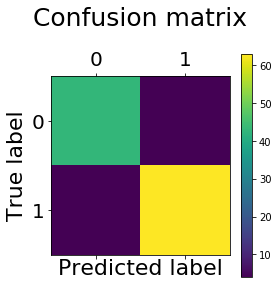

In [56]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_gnb)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

In [57]:
print(classification_report(Y_test, Y_test_pred_gnb))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.94      0.94      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



## Logistic Regression

In [58]:
from sklearn import linear_model

In [62]:
logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs', multi_class='auto', max_iter=3000)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

C:\Users\orsan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [63]:
accuracy= metrics.accuracy_score(Y_pred, Y_test)

print("Accuracy: {0:.2f}".format(accuracy))

Accuracy: 0.97


In [64]:
Y_train_pred_logreg = logreg.predict(X_train)
Y_test_pred_logreg = logreg.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_logreg)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.9736842105263158


In [65]:
print(classification_report(Y_test, Y_test_pred_logreg))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1       0.98      0.97      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Confusion Matrix:
[[46  1]
 [ 2 65]]


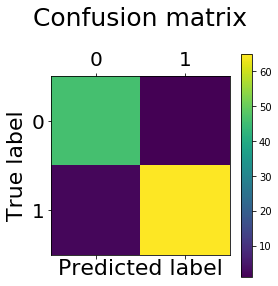

In [66]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_logreg)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

### Bagging (Bootstrap AGGregatING)

Uses multiple base estimators that are weak on purpose.

In [67]:
from sklearn.ensemble import BaggingClassifier

In [68]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5), 
                            n_estimators=10, max_samples=0.8, max_features=0.8)

bagging.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  max_features=0.8, max_samples=0.8)

In [69]:
print(bagging.score(X_train, Y_train))
print(bagging.score(X_test, Y_test))

0.9868131868131869
0.9649122807017544


In [70]:
Y_train_pred_bagging = bagging.predict(X_train)
Y_test_pred_bagging = bagging.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_bagging)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.9649122807017544


In [71]:
print(classification_report(Y_test, Y_test_pred_bagging))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.98      0.96      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



Confusion Matrix:
[[46  1]
 [ 3 64]]


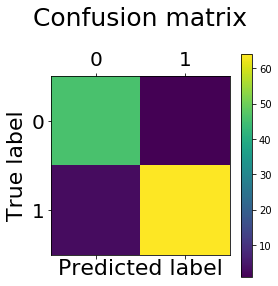

In [72]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_bagging)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

### Boosting

In [73]:
from sklearn.ensemble import AdaBoostClassifier

boosting = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4),
                              n_estimators=30)   
boosting.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=4),
                   n_estimators=30)

In [74]:
print(boosting.score(X_train, Y_train))
print(boosting.score(X_test, Y_test))

1.0
0.9298245614035088


In [75]:
Y_train_pred_boosting = boosting.predict(X_train)
Y_test_pred_boosting = boosting.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_boosting)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.9298245614035088


In [76]:
print(classification_report(Y_test, Y_test_pred_boosting))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.94      0.94      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



Confusion Matrix:
[[43  4]
 [ 4 63]]


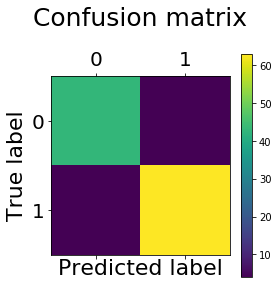

In [77]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_boosting)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

### Stacking

In [78]:
import pandas as pd

In [79]:
Y_train_pred_all = {"lr": Y_train_pred_logreg,
                    
                    "dt" : Y_train_pred_dt,
                    "rf": Y_train_pred_rf,
                    "knn" : Y_train_pred_knn,
                    "gnb" : Y_train_pred_gnb,
                    "kmeans" : Y_train_pred_kmeans,
                    "bagging" : Y_train_pred_bagging,
                    "boosting" : Y_train_pred_boosting
}

Y_train_pred_stacked = pd.DataFrame(Y_train_pred_all,
                                    columns=["lr", "dt", "rf", "knn", "gnb", "kmeans", "bagging", "boosting"])

Y_test_pred_all = {"lr": Y_test_pred_logreg,
                   
                   "dt" : Y_test_pred_dt,
                   "rf": Y_test_pred_rf,
                   "knn" : Y_test_pred_knn,
                   "gnb" : Y_test_pred_gnb,
                   "kmeans" : Y_test_pred_kmeans,
                   "bagging" : Y_test_pred_bagging,
                   "boosting" : Y_test_pred_boosting
}

Y_test_pred_stacked = pd.DataFrame(Y_test_pred_all,
                                   columns=["lr", "dt", "rf", "knn", "gnb", "kmeans", "bagging", "boosting"])

In [80]:
from sklearn.ensemble import RandomForestClassifier

meta_classifier = RandomForestClassifier(n_jobs=-1, n_estimators=100)

meta_classifier.fit(Y_train_pred_stacked, Y_train)

RandomForestClassifier(n_jobs=-1)

In [81]:
meta_classifier.score(Y_train_pred_stacked, Y_train)

1.0

In [82]:
meta_classifier.score(Y_test_pred_stacked, Y_test)

0.9385964912280702

In [83]:
Y_test_pred_stacked_pred = meta_classifier.predict(Y_test_pred_stacked)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_stacked_pred)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.9385964912280702


In [84]:
print(classification_report(Y_test, Y_test_pred_stacked_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        47
           1       0.97      0.93      0.95        67

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



Confusion Matrix:
[[45  2]
 [ 5 62]]


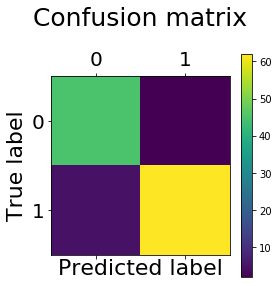

In [85]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_stacked_pred)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

### Gradient Boosting Classifier

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0)
gradient_boosting_classifier.fit(X_train, Y_train)
gradient_boosting_classifier.score(X_test, Y_test)

0.9736842105263158

In [88]:
Y_train_pred_graident_boosting = gradient_boosting_classifier.predict(X_train)
Y_test_pred_gradient_boosting = gradient_boosting_classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_gradient_boosting)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.9736842105263158


In [89]:
print(classification_report(Y_test, Y_test_pred_gradient_boosting))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Confusion Matrix:
[[45  2]
 [ 1 66]]


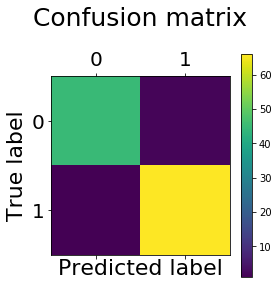

In [90]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_gradient_boosting)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

### Multinomial Naive Bayes

In [91]:
from sklearn.naive_bayes import MultinomialNB

In [92]:
multi_naives_bayes = MultinomialNB()
multi_naives_bayes.fit(X_train,Y_train)
multi_naives_bayes.score(X_test, Y_test)

0.8947368421052632

In [93]:
Y_train_pred_multi_naives_bayes = multi_naives_bayes.predict(X_train)
Y_test_pred_multi_naives_bayes = multi_naives_bayes.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_multi_naives_bayes)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.8947368421052632


In [94]:
print(classification_report(Y_test, Y_test_pred_multi_naives_bayes))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86        47
           1       0.86      0.99      0.92        67

    accuracy                           0.89       114
   macro avg       0.92      0.88      0.89       114
weighted avg       0.90      0.89      0.89       114



Confusion Matrix:
[[36 11]
 [ 1 66]]


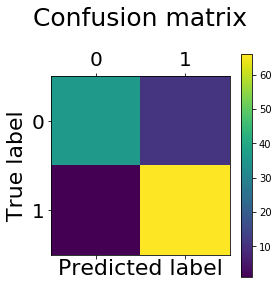

In [95]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_multi_naives_bayes)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

### Complement Naive Bayes

In [96]:
from sklearn.naive_bayes import ComplementNB

In [97]:
complement_naive_bayes = ComplementNB()
complement_naive_bayes.fit(X_train,Y_train)
complement_naive_bayes.score(X_test,Y_test)

0.8947368421052632

In [98]:
Y_train_pred_complement_naive_bayes = complement_naive_bayes.predict(X_train)
Y_test_pred_complement_naive_bayes = complement_naive_bayes.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_complement_naive_bayes)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.8947368421052632


In [99]:
print(classification_report(Y_test, Y_test_pred_complement_naive_bayes))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86        47
           1       0.86      0.99      0.92        67

    accuracy                           0.89       114
   macro avg       0.92      0.88      0.89       114
weighted avg       0.90      0.89      0.89       114



Confusion Matrix:
[[36 11]
 [ 1 66]]


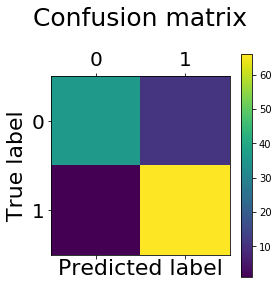

In [100]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_multi_naives_bayes)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

### Bernoulli Naive Bayes

In [101]:
from sklearn.naive_bayes import BernoulliNB

In [102]:
bernoulli_naive_bayes = BernoulliNB()
bernoulli_naive_bayes.fit(X_train,Y_train)
bernoulli_naive_bayes.score(X_test,Y_test)

0.5877192982456141

In [103]:
Y_train_pred_bernoulli_naive_bayes = bernoulli_naive_bayes.predict(X_train)
Y_test_pred_bernoulli_naive_bayes = bernoulli_naive_bayes.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_bernoulli_naive_bayes)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.5877192982456141


In [104]:
print(classification_report(Y_test, Y_test_pred_bernoulli_naive_bayes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.59      1.00      0.74        67

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114



C:\Users\orsan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[ 0 47]
 [ 0 67]]


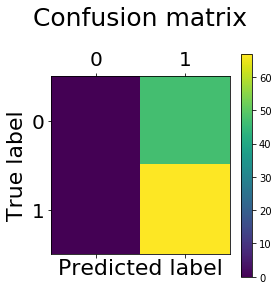

In [105]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_bernoulli_naive_bayes)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

### Extra Trees Classifier

In [106]:
from sklearn.ensemble import ExtraTreesClassifier

In [107]:
extra_trees = ExtraTreesClassifier(n_estimators=100)
extra_trees.fit(X_train,Y_train)
extra_trees.score(X_test,Y_test)

0.9385964912280702

In [108]:
Y_train_pred_extra_trees = extra_trees.predict(X_train)
Y_test_pred_extra_trees = extra_trees.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_extra_trees)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.9385964912280702


In [109]:
print(classification_report(Y_test, Y_test_pred_extra_trees))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        47
           1       0.94      0.96      0.95        67

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



Confusion Matrix:
[[43  4]
 [ 3 64]]


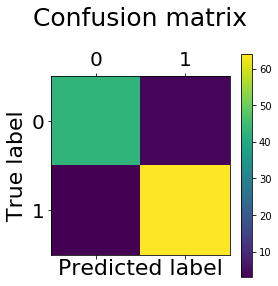

In [110]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_extra_trees)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

### Histogram Based Gradient Boosting

In [112]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [113]:
hist_grad_boost = HistGradientBoostingClassifier()
hist_grad_boost.fit(X_train,Y_train)
hist_grad_boost.score(X_test,Y_test)

0.9649122807017544

In [114]:
Y_train_hist_grad_boost = hist_grad_boost.predict(X_train)
Y_test_pred_hist_grad_boost = hist_grad_boost.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_hist_grad_boost)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.9649122807017544


In [115]:
print(classification_report(Y_test, Y_test_pred_hist_grad_boost))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Confusion Matrix:
[[43  4]
 [ 3 64]]


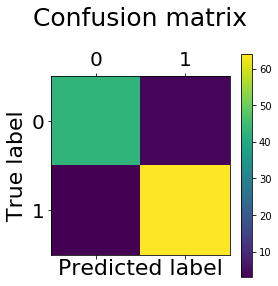

In [116]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_extra_trees)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

### Neural Network : MLP Classifier

In [117]:
from sklearn.neural_network import MLPClassifier

In [118]:
mlp_class = MLPClassifier(max_iter=1000)
mlp_class.fit(X_train,Y_train)
mlp_class.score(X_test,Y_test)

0.9649122807017544

In [119]:
Y_train_mlp_class = mlp_class.predict(X_train)
Y_test_pred_mlp_class  = mlp_class.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_mlp_class)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.9649122807017544


In [120]:
print(classification_report(Y_test, Y_test_pred_mlp_class))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.94      1.00      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Confusion Matrix:
[[43  4]
 [ 0 67]]


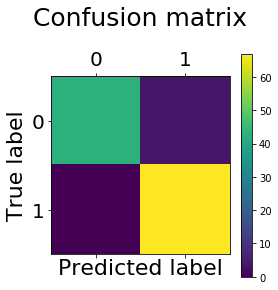

In [121]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_mlp_class)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

### Sthocastic Gradient Descent Classifier

In [122]:
from sklearn.linear_model import SGDClassifier

In [123]:
sgd_class = SGDClassifier()
sgd_class.fit(X_train,Y_train)
sgd_class.score(X_test,Y_test)

0.9385964912280702

In [124]:
Y_train_sgd_class = sgd_class.predict(X_train)
Y_test_pred_sgd_class  = sgd_class.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_sgd_class)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.9385964912280702


In [125]:
print(classification_report(Y_test, Y_test_pred_sgd_class))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.93      0.97      0.95        67

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



Confusion Matrix:
[[42  5]
 [ 2 65]]


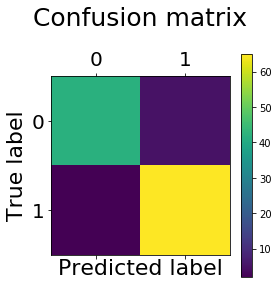

In [126]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_sgd_class)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

### Ridge Classifier

In [127]:
from sklearn.linear_model import RidgeClassifier

In [128]:
ridge_class = RidgeClassifier()
ridge_class.fit(X_train,Y_train)
ridge_class.score(X_test,Y_test)

0.956140350877193

In [129]:
Y_train_ridge_class = ridge_class.predict(X_train)
Y_test_pred_ridge_class  = ridge_class.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_ridge_class)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.956140350877193


In [130]:
print(classification_report(Y_test, Y_test_pred_ridge_class))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        47
           1       0.93      1.00      0.96        67

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Confusion Matrix:
[[42  5]
 [ 0 67]]


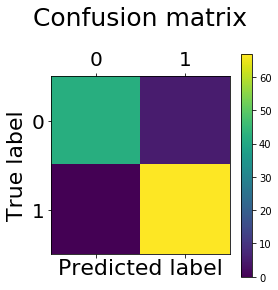

In [131]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_ridge_class)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

### Perceptron Classifier

In [132]:
from sklearn.linear_model import Perceptron

In [133]:
percep_class = Perceptron()
percep_class.fit(X_train,Y_train)
percep_class.score(X_test,Y_test)

0.6491228070175439

In [134]:
Y_train_percep_class = percep_class.predict(X_train)
Y_test_pred_percep_class = percep_class.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_percep_class)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.6491228070175439


In [135]:
print(classification_report(Y_test, Y_test_pred_percep_class))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        47
           1       1.00      0.40      0.57        67

    accuracy                           0.65       114
   macro avg       0.77      0.70      0.64       114
weighted avg       0.81      0.65      0.63       114



Confusion Matrix:
[[47  0]
 [40 27]]


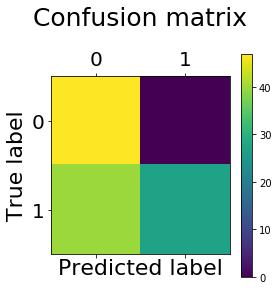

In [136]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_percep_class)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

### Passive-Agressive Classifier

In [137]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [138]:
pass_agg_class = PassiveAggressiveClassifier()
pass_agg_class.fit(X_train,Y_train)
pass_agg_class.score(X_test,Y_test)

0.9210526315789473

In [139]:
Y_train_pass_agg_class = pass_agg_class.predict(X_train)
Y_test_pred_pass_agg_class = pass_agg_class.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_pass_agg_class)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.9210526315789473


In [140]:
print(classification_report(Y_test, Y_test_pred_pass_agg_class))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        47
           1       0.90      0.97      0.94        67

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



Confusion Matrix:
[[40  7]
 [ 2 65]]


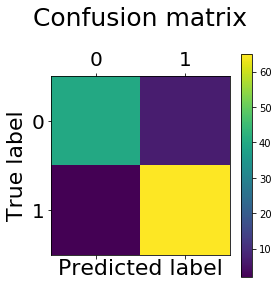

In [141]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_pass_agg_class)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

### Linear Discriminant Analysis Classifier

In [142]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [143]:
lin_dis_class = LinearDiscriminantAnalysis()
lin_dis_class.fit(X_train,Y_train)
lin_dis_class.score(X_test,Y_test)

0.9649122807017544

In [144]:
Y_train_lin_dis_class = lin_dis_class.predict(X_train)
Y_test_pred_lin_dis_class = lin_dis_class.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_lin_dis_class)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.9649122807017544


Confusion Matrix:
[[43  4]
 [ 0 67]]


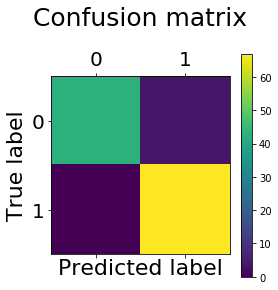

In [145]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_lin_dis_class)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()

### Quadratic Discriminant Analysis Classifier

In [146]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [147]:
quad_disc_class = QuadraticDiscriminantAnalysis()
quad_disc_class.fit(X_train,Y_train)
quad_disc_class.score(X_test,Y_test)

0.956140350877193

In [148]:
Y_train_quad_disc_class = quad_disc_class.predict(X_train)
Y_test_pred_quad_disc_class = quad_disc_class.predict(X_test)
accuracy_score = metrics.accuracy_score(Y_test, Y_test_pred_quad_disc_class)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.956140350877193


In [149]:
print(classification_report(Y_test, Y_test_pred_quad_disc_class))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.97      0.96      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Confusion Matrix:
[[45  2]
 [ 3 64]]


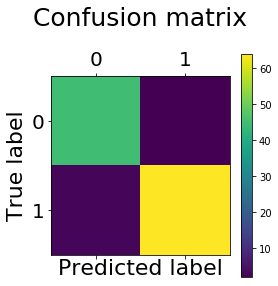

In [150]:
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_test_pred_quad_disc_class)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix', fontsize=25, position=(0.5,1.25))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('True label', fontsize=22)
plt.xlabel('Predicted label', fontsize=22)
plt.colorbar()

plt.show()